In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [75]:
use_cols = ['class','spore-print-color','gill-color','gill-size','stalk-root','habitat','stalk-shape','odor','population']
use_cols

['class',
 'spore-print-color',
 'gill-color',
 'gill-size',
 'stalk-root',
 'habitat',
 'stalk-shape',
 'odor',
 'population']

In [76]:
data_label = data[use_cols]
data_label

,class,spore-print-color,gill-color,gill-size,stalk-root,habitat,stalk-shape,odor,population
0,p,k,k,n,e,u,e,p,s
1,e,n,k,b,c,g,e,a,n
2,e,n,n,b,c,m,e,l,n
3,p,k,n,n,e,u,e,p,s
4,e,n,k,b,e,g,t,n,a
...,...,...,...,...,...,...,...,...,...
8119,e,b,y,b,?,l,e,n,c
8120,e,b,y,b,?,l,e,n,v
8121,e,b,n,b,?,l,e,n,c
8122,p,w,b,n,?,l,t,y,v


In [77]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
final_data = data_label.apply(label.fit_transform)
final_data

,class,spore-print-color,gill-color,gill-size,stalk-root,habitat,stalk-shape,odor,population
0,1,2,4,1,3,5,0,6,3
1,0,3,4,0,2,1,0,0,2
2,0,3,5,0,2,3,0,3,2
3,1,2,5,1,3,5,0,6,3
4,0,3,4,0,3,1,1,5,0
...,...,...,...,...,...,...,...,...,...
8119,0,0,11,0,0,2,0,5,1
8120,0,0,11,0,0,2,0,5,4
8121,0,0,5,0,0,2,0,5,1
8122,1,7,0,1,0,2,1,8,4


In [78]:
# Label for a perticular class from a column
for col in use_cols:
    dt = {col:data_label[col].unique(), 'labels':label.fit_transform(data_label[col].unique())}
    display(pd.DataFrame(dt).sort_values('labels'))

,class,labels
1,e,0
0,p,1


,spore-print-color,labels
8,b,0
3,h,1
0,k,2
1,n,3
6,o,4
5,r,5
2,u,6
4,w,7
7,y,8


,gill-color,labels
8,b,0
7,e,1
2,g,2
5,h,3
0,k,4
1,n,5
11,o,6
3,p,7
9,r,8
6,u,9


,gill-size,labels
1,b,0
0,n,1


,stalk-root,labels
4,?,0
2,b,1
1,c,2
0,e,3
3,r,4


,habitat,labels
3,d,0
1,g,1
6,l,2
2,m,3
4,p,4
0,u,5
5,w,6


,stalk-shape,labels
0,e,0
1,t,1


,odor,labels
1,a,0
5,c,1
4,f,2
2,l,3
8,m,4
3,n,5
0,p,6
7,s,7
6,y,8


,population,labels
2,a,0
5,c,1
1,n,2
0,s,3
3,v,4
4,y,5


In [79]:
for col in use_cols:
    print(col)
    dt = {col:data_label[col].unique(), 'labels':label.fit_transform(data_label[col].unique())}
    df = pd.DataFrame(dt).sort_values('labels')
    dt = {}
    for i in range(0,len(df[col])):
        dt[df[col][i]] = df['labels'][i]
    print(dt)
    print('\n\n')

class
{'p': 1, 'e': 0}



spore-print-color
{'k': 2, 'n': 3, 'u': 6, 'h': 1, 'w': 7, 'r': 5, 'o': 4, 'y': 8, 'b': 0}



gill-color
{'k': 4, 'n': 5, 'g': 2, 'p': 7, 'w': 10, 'h': 3, 'u': 9, 'e': 1, 'b': 0, 'r': 8, 'y': 11, 'o': 6}



gill-size
{'n': 1, 'b': 0}



stalk-root
{'e': 3, 'c': 2, 'b': 1, 'r': 4, '?': 0}



habitat
{'u': 5, 'g': 1, 'm': 3, 'd': 0, 'p': 4, 'w': 6, 'l': 2}



stalk-shape
{'e': 0, 't': 1}



odor
{'p': 6, 'a': 0, 'l': 3, 'n': 5, 'f': 2, 'c': 1, 'y': 8, 's': 7, 'm': 4}



population
{'s': 3, 'n': 2, 'a': 0, 'v': 4, 'y': 5, 'c': 1}





In [70]:
dt_spore_print_color = {'k': 2, 'n': 3, 'u': 6, 'h': 1, 'w': 7, 'r': 5, 'o': 4, 'y': 8, 'b': 0}
dt_gill_color = {'k': 4, 'n': 5, 'g': 2, 'p': 7, 'w': 10, 'h': 3, 'u': 9, 'e': 1, 'b': 0, 'r': 8, 'y': 11, 'o': 6}
dt_gill_size = {'n': 1, 'b': 0}
dt_stalk_root = {'e': 3, 'c': 2, 'b': 1, 'r': 4, '?': 0}
dt_habitat = {'u': 5, 'g': 1, 'm': 3, 'd': 0, 'p': 4, 'w': 6, 'l': 2}
dt_stalk_shape = {'e': 0, 't': 1}
dt_odor = {'p': 6, 'a': 0, 'l': 3, 'n': 5, 'f': 2, 'c': 1, 'y': 8, 's': 7, 'm': 4}
dt_population = {'s': 3, 'n': 2, 'a': 0, 'v': 4, 'y': 5, 'c': 1}

In [36]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , accuracy_score , f1_score
from sklearn.metrics import confusion_matrix

In [28]:
X_label = final_data.iloc[:,1:]
y_label = final_data.iloc[:,0]

In [29]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_label, y_label, test_size = 0.2, random_state = 0)

In [30]:
tre = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=2, random_state=0)
tre.fit(Xl_train, yl_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [41]:
fea_imp = {'columns':use_cols[1:], 'importance':tre.feature_importances_}
feature_importance = pd.DataFrame(fea_imp)
feature_importance.sort_values('importance',ascending = False, inplace=True)
feature_importance = feature_importance.reset_index().drop('index', axis=1)
feature_importance

,columns,importance
0,spore-print-color,0.372909
1,gill-color,0.270092
2,gill-size,0.153465
3,odor,0.089691
4,stalk-root,0.036327
5,habitat,0.028625
6,stalk-shape,0.025978
7,population,0.022913


In [34]:
#Predict for X dataset
y_train_predict_tree = tre.predict(Xl_train)

train_acc_score = accuracy_score(yl_train, y_train_predict_tree)
train_f1_score = f1_score(yl_train, y_train_predict_tree)
print('Train Accuracy Score : ' , train_acc_score)
print('Train F1 Score : ' , train_f1_score)

# print classification report
print('\n\n',classification_report(yl_train, y_train_predict_tree, digits=4))

Train Accuracy Score :  1.0
Train F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3356
           1     1.0000    1.0000    1.0000      3143

    accuracy                         1.0000      6499
   macro avg     1.0000    1.0000    1.0000      6499
weighted avg     1.0000    1.0000    1.0000      6499



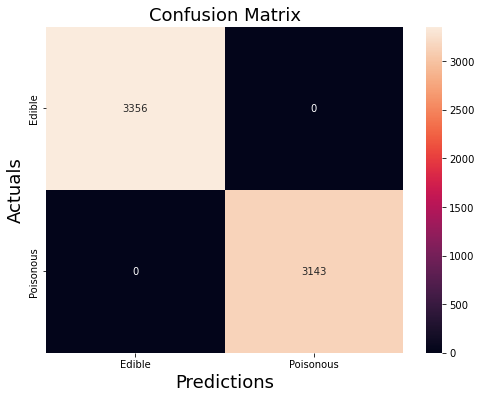

In [37]:
cm = pd.DataFrame(confusion_matrix(yl_train,y_train_predict_tree), columns=['Edible', 'Poisonous'], index=['Edible', 'Poisonous'])

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [38]:
y_test_predict_tree = tre.predict(Xl_test)

test_acc_score = accuracy_score(yl_test, y_test_predict_tree)
test_f1_score = f1_score(yl_test, y_test_predict_tree)
print('Test Accuracy Score : ' , test_acc_score)
print('Test F1 Score : ' , test_f1_score)

# print classification report
print('\n\n',classification_report(yl_test, y_test_predict_tree, digits=4))

Test Accuracy Score :  1.0
Test F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       852
           1     1.0000    1.0000    1.0000       773

    accuracy                         1.0000      1625
   macro avg     1.0000    1.0000    1.0000      1625
weighted avg     1.0000    1.0000    1.0000      1625



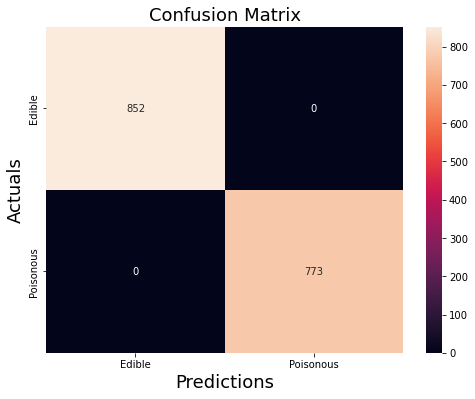

In [40]:
cm = pd.DataFrame(confusion_matrix(yl_test,y_test_predict_tree), columns=['Edible', 'Poisonous'], index=['Edible', 'Poisonous'])
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [98]:
test_data = pd.read_csv('test_mushroom.csv')
test_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,f,f,g,f,f,f,c,b,h,e,...,k,p,p,p,w,o,l,h,y,p
4995,f,y,y,f,f,f,c,b,h,e,...,k,n,p,p,w,o,l,h,v,d
4996,x,s,n,t,n,f,c,b,w,e,...,s,w,e,p,w,t,e,w,c,w
4997,f,f,g,f,f,f,c,b,g,e,...,k,b,n,p,w,o,l,h,y,p


In [99]:
use_cols = ['spore-print-color','gill-color','gill-size','stalk-root','habitat','stalk-shape','odor','population']
use_cols

['spore-print-color',
 'gill-color',
 'gill-size',
 'stalk-root',
 'habitat',
 'stalk-shape',
 'odor',
 'population']

In [82]:
dt_class = {'p': 1, 'e': 0}
dt_spore_print_color = {'k': 2, 'n': 3, 'u': 6, 'h': 1, 'w': 7, 'r': 5, 'o': 4, 'y': 8, 'b': 0}
dt_gill_color = {'k': 4, 'n': 5, 'g': 2, 'p': 7, 'w': 10, 'h': 3, 'u': 9, 'e': 1, 'b': 0, 'r': 8, 'y': 11, 'o': 6}
dt_gill_size = {'n': 1, 'b': 0}
dt_stalk_root = {'e': 3, 'c': 2, 'b': 1, 'r': 4, '?': 0}
dt_habitat = {'u': 5, 'g': 1, 'm': 3, 'd': 0, 'p': 4, 'w': 6, 'l': 2}
dt_stalk_shape = {'e': 0, 't': 1}
dt_odor = {'p': 6, 'a': 0, 'l': 3, 'n': 5, 'f': 2, 'c': 1, 'y': 8, 's': 7, 'm': 4}
dt_population = {'s': 3, 'n': 2, 'a': 0, 'v': 4, 'y': 5, 'c': 1}

In [83]:
map_label = {'spore-print-color':dt_spore_print_color, 'gill-color':dt_gill_color, 'gill-size':dt_gill_size, 
             'stalk-root':dt_stalk_root, 'habitat':dt_habitat, 'stalk-shape':dt_stalk_shape, 'odor':dt_odor, 
             'population':dt_population, 'class':{'p': 1, 'e': 0}}
map_label

{'spore-print-color': {'k': 2,
  'n': 3,
  'u': 6,
  'h': 1,
  'w': 7,
  'r': 5,
  'o': 4,
  'y': 8,
  'b': 0},
 'gill-color': {'k': 4,
  'n': 5,
  'g': 2,
  'p': 7,
  'w': 10,
  'h': 3,
  'u': 9,
  'e': 1,
  'b': 0,
  'r': 8,
  'y': 11,
  'o': 6},
 'gill-size': {'n': 1, 'b': 0},
 'stalk-root': {'e': 3, 'c': 2, 'b': 1, 'r': 4, '?': 0},
 'habitat': {'u': 5, 'g': 1, 'm': 3, 'd': 0, 'p': 4, 'w': 6, 'l': 2},
 'stalk-shape': {'e': 0, 't': 1},
 'odor': {'p': 6,
  'a': 0,
  'l': 3,
  'n': 5,
  'f': 2,
  'c': 1,
  'y': 8,
  's': 7,
  'm': 4},
 'population': {'s': 3, 'n': 2, 'a': 0, 'v': 4, 'y': 5, 'c': 1},
 'class': {'p': 1, 'e': 0}}

In [84]:
test_data = test_data[use_cols]
test_data

,spore-print-color,gill-color,gill-size,stalk-root,habitat,stalk-shape,odor,population
0,k,k,n,e,u,e,p,s
1,n,k,b,c,g,e,a,n
2,n,n,b,c,m,e,l,n
3,k,n,n,e,u,e,p,s
4,n,k,b,e,g,t,n,a
...,...,...,...,...,...,...,...,...
4994,h,h,b,b,p,e,f,y
4995,h,h,b,b,d,e,f,v
4996,w,w,b,?,w,e,n,c
4997,h,g,b,b,p,e,f,y


In [86]:
test_label = pd.DataFrame()
for col in use_cols:
    test_label[col] = test_data[col].map(map_label[col])
test_label

,spore-print-color,gill-color,gill-size,stalk-root,habitat,stalk-shape,odor,population
0,2,4,1,3,5,0,6,3
1,3,4,0,2,1,0,0,2
2,3,5,0,2,3,0,3,2
3,2,5,1,3,5,0,6,3
4,3,4,0,3,1,1,5,0
...,...,...,...,...,...,...,...,...
4994,1,3,0,1,4,0,2,5
4995,1,3,0,1,0,0,2,4
4996,7,10,0,0,6,0,5,1
4997,1,2,0,1,4,0,2,5


In [88]:
y_pred_tree = tre.predict(test_label)
y_pred_tree

array([1, 0, 0, ..., 0, 1, 1])

In [96]:
pred_data = test_label
pred_data['class'] = y_pred_tree
pred_data['class'] = pred_data['class'].map({0:'Edible', 1:'Poisonous'})

In [97]:
pred_data

,spore-print-color,gill-color,gill-size,stalk-root,habitat,stalk-shape,odor,population,class
0,2,4,1,3,5,0,6,3,Poisonous
1,3,4,0,2,1,0,0,2,Edible
2,3,5,0,2,3,0,3,2,Edible
3,2,5,1,3,5,0,6,3,Poisonous
4,3,4,0,3,1,1,5,0,Edible
...,...,...,...,...,...,...,...,...,...
4994,1,3,0,1,4,0,2,5,Poisonous
4995,1,3,0,1,0,0,2,4,Poisonous
4996,7,10,0,0,6,0,5,1,Edible
4997,1,2,0,1,4,0,2,5,Poisonous


In [107]:
pred_data['class'].value_counts().values

array([3443, 1556], dtype=int64)

In [110]:
dt = {'Mushroom_Classification':pred_data['class'].value_counts().index.tolist(), 
      'Counts':pred_data['class'].value_counts().values.tolist()}
pd.DataFrame(dt)

,Mushroom_Classification,Counts
0,Edible,3443
1,Poisonous,1556
